## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [71]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [72]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [73]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [74]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [75]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [76]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [77]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0
...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,1.0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,1.0,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,1.0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,0.0,0,1


In [78]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## **Matriz de Confusão**

In [80]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=[
        "Predict died",
        "Predict Survive",
    ],
    index=["True Death", "True Survive"],
)

,Predict died,Predict Survive
True Death,199,25
True Survive,48,121


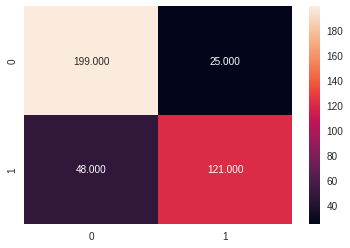

In [81]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt= '.3f')

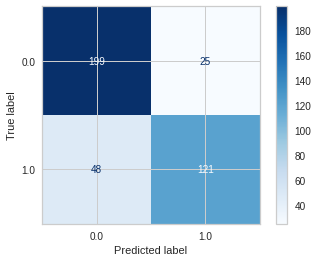

In [82]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', values_format='.3g')

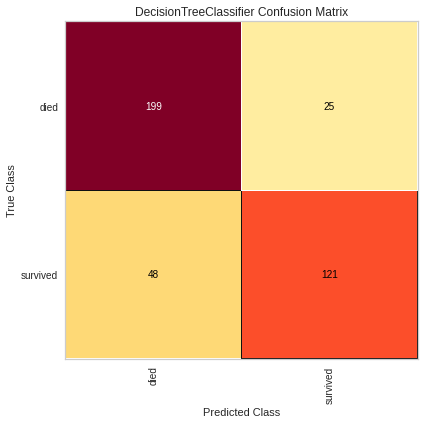

In [83]:
from yellowbrick.classifier import ConfusionMatrix

mapping = {0: "died", 1: "survived"}

fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    dt,
    classes=["died", "survived"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## **Accuracy/Acurácia**
(tp + tn) / (all)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8142493638676844

In [85]:
dt.score(X_test, y_test)

0.8142493638676844

## **Recall/Sensibilidade**
tp / (tp + fn)

In [86]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7159763313609467

## **Specificity/Especificidade**
tn / (tn+fp)

In [87]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.8883928571428571

## **Precision/Precisão**
tp / (tp + fp)

In [117]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.805668016194332

## **F1** 
F1 = 2 * (precisão * recall) / (precisão + recall)



In [89]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7682539682539683

## **Relatório de Classificação**

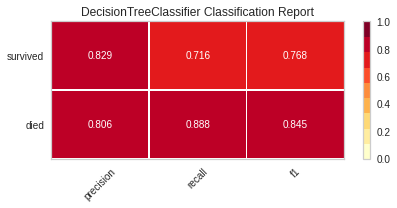

In [90]:
from yellowbrick.classifier import ClassificationReport

fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(
    dt,
    classes=["died", "survived"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

In [116]:
121/(121+48)

0.7159763313609467

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['died','survived']))

              precision    recall  f1-score   support

        died       0.81      0.89      0.85       224
    survived       0.83      0.72      0.77       169

    accuracy                           0.81       393
   macro avg       0.82      0.80      0.81       393
weighted avg       0.82      0.81      0.81       393



## **ROC**

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8021845942519018

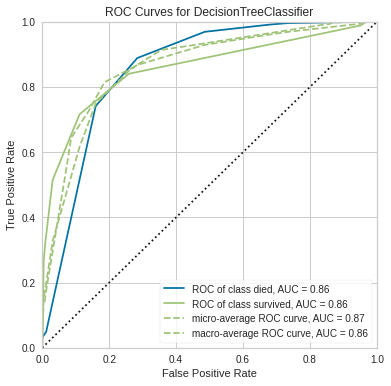

In [93]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(dt, classes=['died','survived'])
roc_viz.fit(X_train, y_test)
roc_viz.score(X_test, y_test)

roc_viz.poof()

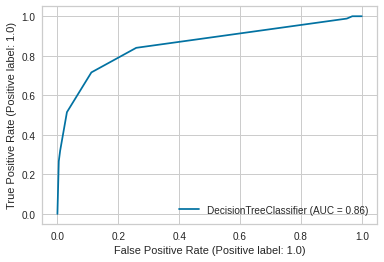

In [95]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt, X_test, y_test) 
plt.show()

## **Curva de Recall-Precisão**

In [96]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred)

0.7155150490642249

0.8177126373723864


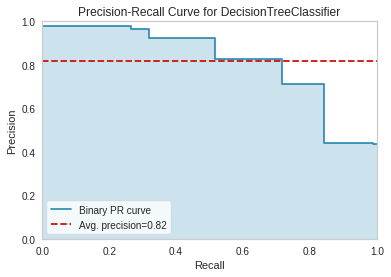

In [98]:
from yellowbrick.classifier import PrecisionRecallCurve

fig, ax = plt.subplots(figsize=(6, 4))
viz = PrecisionRecallCurve(dt)
viz.fit(X_train, y_train)
print(viz.score(X_test, y_test))
viz.poof()

## **Gráficos de ganho cumulativos**

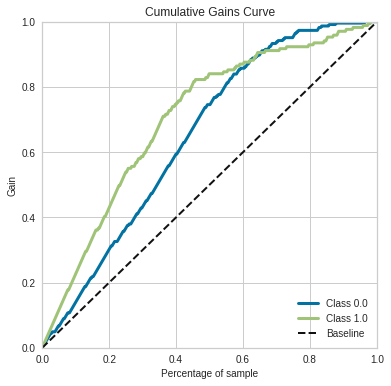

In [107]:
#!pip install scikit-plot
import scikitplot as skplt

fig, ax = plt.subplots(figsize=(6, 6))
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, ax=ax
)

## **Gráfico de Elevação**

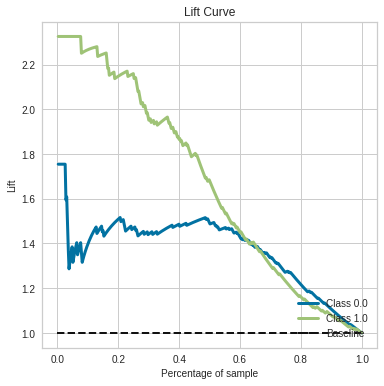

In [108]:
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_lift_curve(
    y_test, y_probas, ax=ax
)

## **Balanceamento de classes**

Um leve desequilíbrio de classes.

In [ ]:
from yellowbrick.classifier import ClassBalance
fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(
    labels=["Died", "Survived"]
)
cb_viz.fit(y_test)
cb_viz.poof()

## **Erro de previsão de classes**

Erro de previsão de classe. No topo da barra esquerda estão as pessoas que morreram, mas previmos que sobreviveram (falso positivo). Na parte inferior da barra direita estão as pessoas que sobreviveram, mas o modelo previu a morte (falso negativo).

In [ ]:
from yellowbrick.classifier import ClassPredictionError
fig, ax = plt.subplots(figsize=(6, 3))
cpe_viz = ClassPredictionError(
    dt, classes=["died", "survived"]
)
cpe_viz.score(X_test, y_test)
cpe_viz.poof()

## **Limiar de discriminação**

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold
fig, ax = plt.subplots(figsize=(6, 5))
dt_viz = DiscriminationThreshold(dt)
dt_viz.fit(X, y)
dt_viz.poof()